  # Netflix Data Visualization

Developed by: Fairaaz Ahmed & Advika Kottiyattil

---



**Objective of the project:-**

The purpose of this Project is to explore the Netflix dataset, understand its structure, identify key patterns, and provide insights into content type distribution, content production trends, and key contributors (such as top directors, actors, and countries). Through visualizations and data exploration, we can derive meaningful insights for further analysis.


---





**Variable understanding:-**


1. show_id: Unique identifier for each show in the dataset.

2. type: Type of content, either "Movie" or "TV Show".

3. title: Title of the content.

4. director: Director of the movie or TV show.

5. cast: List of actors featured in the content.

6. country: Country where the content was produced.

7. date_added: Date when the content was added to Netflix.

8. release_year: Year the content was originally released.

9. rating: Age rating assigned to the content (e.g., PG, R, TV-MA).

10. duration: Duration of the movie (in minutes) or number of seasons (for TV shows).

11. listed_in: Genres or categories the content falls into.

12. description: Short description of the content.



---


**Exploratory Data Analysis (EDA):-**

This is the step by step EDA used for this project.

Step 1: Import necessary libraries for data analysis and visualization

Step 2: Load the dataset from the CSV file into a pandas DataFrame

Step 3: Initial inspection of the dataset to understand its structure

Step 4: Check the dimensions of the dataset (number of rows and columns)

Step 5: Check the data types and missing values in each column

Step 6: Summary statistics of numerical columns (e.g., for numeric data)

Step 7: Check for missing values across the entire dataset

Step 8: View the column names to understand the variables present in the dataset

Step 9: Analyze the distribution of content types (Movies vs TV Shows)

Step 10: Check the distribution of content added over the years

Step 11: Analyze the top 10 countries producing Netflix content and visualize it

Step 12: Check the distribution of content ratings and visualize it

Step 13: Analyze the top directors with the most titles and visualize it

Step 14: Analyze movie duration distribution and visualize it

Step 15: Analyze TV show seasons and visualize it


---







**Github Link:**
https://github.com/Zaariaf/Sprint-1

In [27]:
# Importing all the libraries used in the project
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations
import numpy as np

# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import the warnings module to manage warning messages
import warnings

# Ignore any warning messages
warnings.filterwarnings("ignore")

# Set the resolution of the plots to 140 dots per inch (DPI) for higher quality images
plt.rcParams['figure.dpi'] = 140


In [29]:
#Importing the CSV File on which the project will take place
df = pd.read_csv('netflix_titles.csv')

#This shows the first 3 values of the dataset
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
df.shape

(8807, 12)

In [28]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [7]:
# Finding out the missing data percentage

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


- 5 columns have missing values, with Director missing 1/3 of the time

# Dealing with the missing data

- This is always the scenario , but in this case, we will:
    - replace blank countries with the mode (most common) country
    

In [31]:
# Replacment

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Dropping the null values

df.dropna(inplace=True)

# Dropping the Duplicate values

df.drop_duplicates(inplace= True)

In [32]:
#Checking for missing value in each column
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [33]:
#This provides a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


# Missing values dealt with, but the date isn't right so now we will fix the date.

In [25]:
# Convert the 'date_added' column to a datetime object for easier manipulation of dates, handling errors gracefully
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month as a numeric value from the 'date_added' column and store it in a new column 'month_added'
df['month_added'] = df['date_added'].dt.month

# Extract the month name (e.g., January, February) from the 'date_added' column and store it in a new column 'month_name_added'
df['month_name_added'] = df['date_added'].dt.month_name()

# Extract the year from the 'date_added' column and store it in a new column 'year_added'
df['year_added'] = df['date_added'].dt.year

# Display the first 3 rows of the DataFrame to confirm the new columns have been created correctly
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0


# Data Visualization

# I'll use the Netflix brand colours to make it more authentic

https://brand.netflix.com/en/assets/brand-symbol/


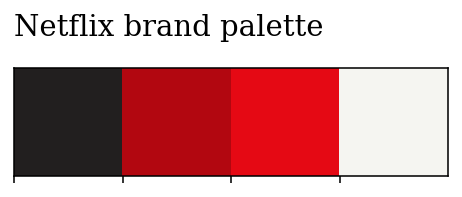

In [26]:
# The colors specified here are part of the Netflix brand palette
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])

# Set the title of the plot
# "Netflix brand palette" is the title text
# loc='left' positions the title to the left
# fontfamily='serif' sets the font to serif
# fontsize=15 sets the font size to 15
# y=1.2 positions the title above the plot
plt.title("Netflix brand palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)

# Display the plot
plt.show()

# Content - Let's explore

Now we've seen how Netflix came to dominate our TV screens, let's have a look at the content they offer...

In [ ]:
# Group the DataFrame by 'type' and count the occurrences of each type
x = df.groupby(['type'])['type'].count()

# Get the total number of rows in the DataFrame
y = len(df)

# Calculate the ratio of each type's count to the total count, rounded to 2 decimal places
r = ((x / y)).round(2)

# Convert the result to a DataFrame and transpose it
mf_ratio = pd.DataFrame(r).T

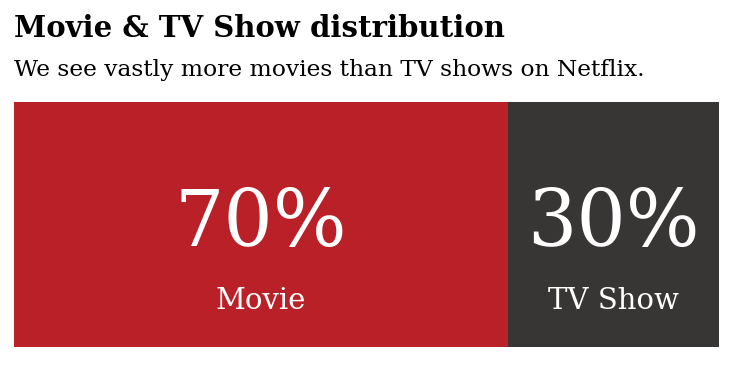

In [ ]:
# Create a figure and a single set of axes with specific size
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

# Create a horizontal bar chart for 'Movie' data
ax.barh(mf_ratio.index, mf_ratio['Movie'], color='#b20710', alpha=0.9, label='Male')

# Create a horizontal bar chart for 'TV Show' data, with bars starting after 'Movie' bars
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], color='#221f1f', alpha=0.9, label='Female')

# Set the x-axis limit from 0 to 1
ax.set_xlim(0, 1)

# Remove x-axis ticks
ax.set_xticks([])

# Remove y-axis ticks
ax.set_yticks([])

# Annotate movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
                xy=(mf_ratio['Movie'][i] / 2, i),
                va='center', ha='center', fontsize=40, fontweight='light', fontfamily='serif', color='white')
    ax.annotate("Movie",
                xy=(mf_ratio['Movie'][i] / 2, -0.25),
                va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Annotate TV Show percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i] + mf_ratio['TV Show'][i] / 2, i),
                va='center', ha='center', fontsize=40, fontweight='light', fontfamily='serif', color='white')
    ax.annotate("TV Show",
                xy=(mf_ratio['Movie'][i] + mf_ratio['TV Show'][i] / 2, -0.25),
                va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Add main title to the plot
fig.text(0.125, 1.03, 'Movie & TV Show distribution', fontfamily='serif', fontsize=15, fontweight='bold', )

# Add subtitle to the plot
fig.text(0.125, 0.92, 'We see vastly more movies than TV shows on Netflix.', fontfamily='serif', fontsize=12, )

# Remove plot spines (borders) for a cleaner look
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Hide the legend since the plot is already labeled
ax.legend().set_visible(False)

# Display the plot
plt.show()


# By Country

So we now know there are much more movies than TV shows on Netflix.

Now lets look at content by country.

I would imagine that the USA will have the most content.

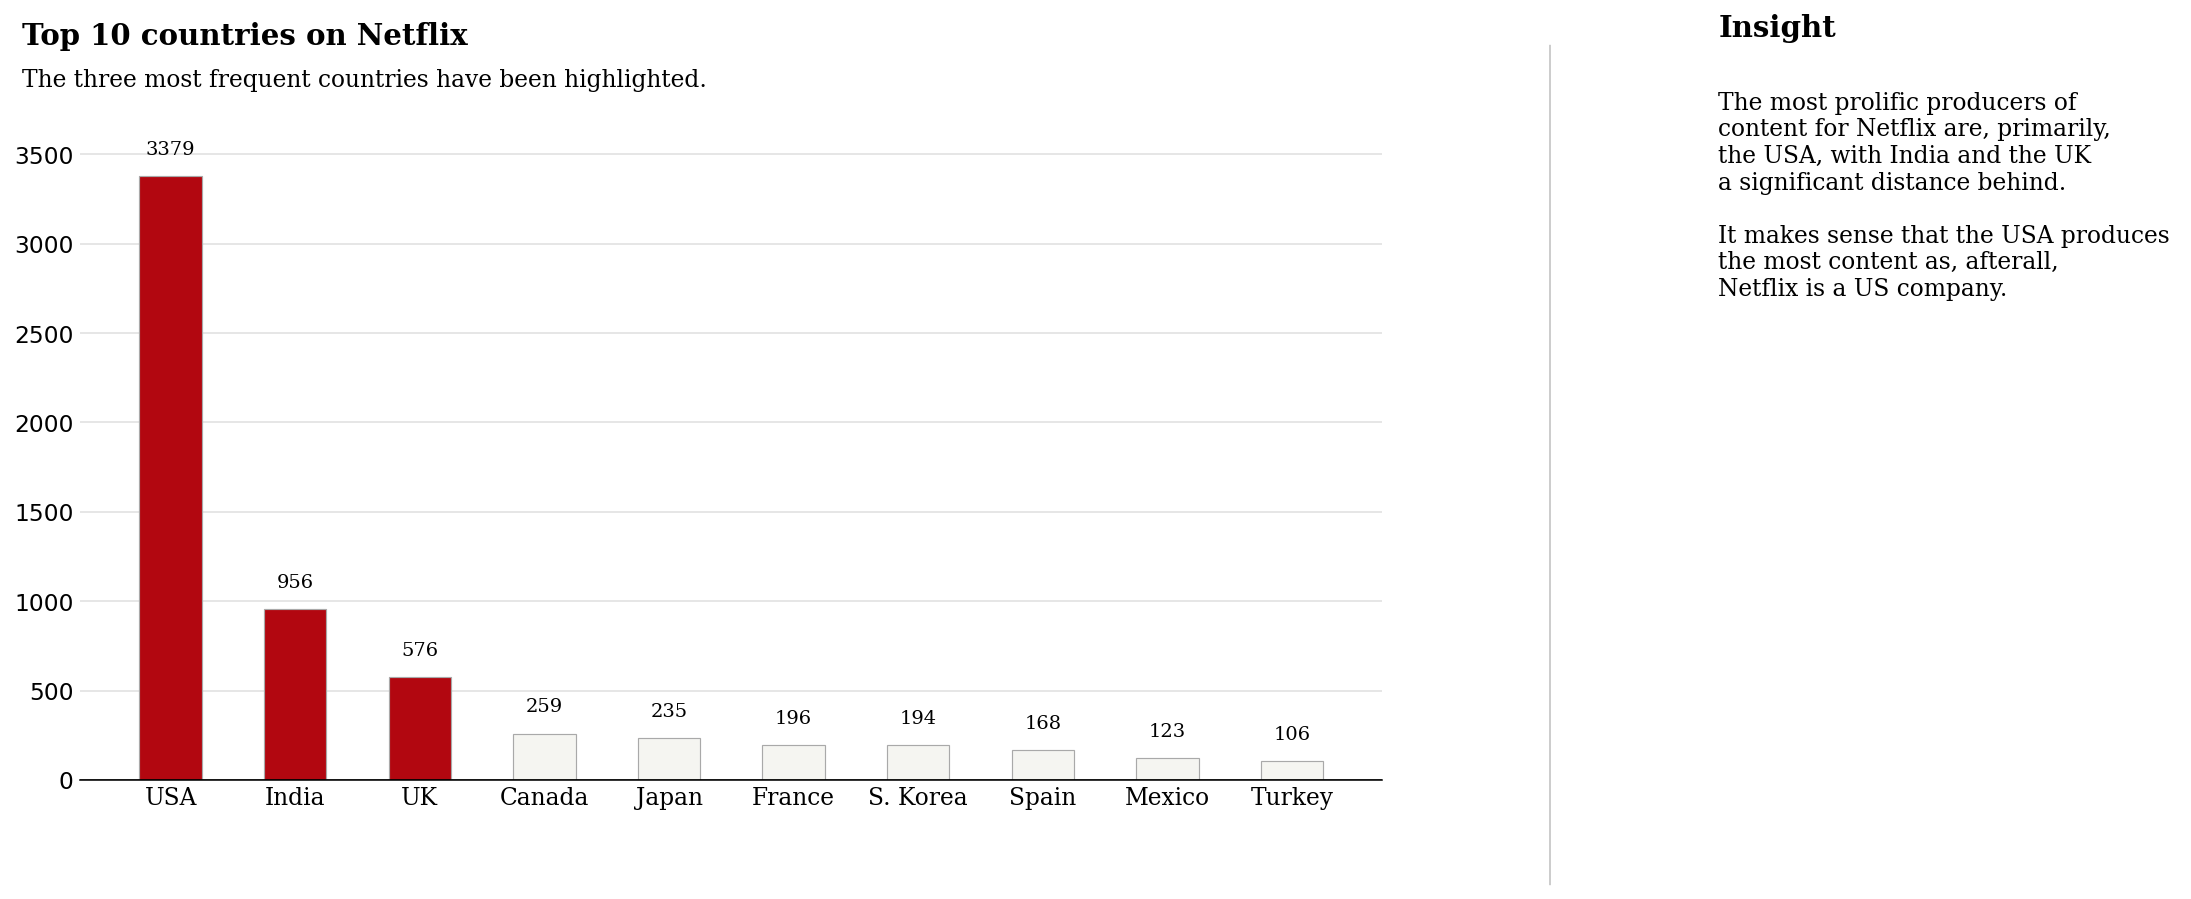

In [ ]:
# Group the DataFrame by 'first_country' and sum the 'count' column, then sort the result in descending order
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot
# Create a color map for the bars, with default color and highlight for the top 3
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'  # Color highlight for the top 3 countries

# Set up the figure and axes with specific size
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Create a bar plot using the data, setting bar colors and other properties
ax.bar(data.index, data, width=0.5, edgecolor='darkgray', linewidth=0.6, color=color_map)

# Annotations
# Add annotations above each bar with the count value
for i in data.index:
    ax.annotate(f"{data[i]}",
                xy=(i, data[i] + 150),  # Position annotation above the bar
                va='center', ha='center', fontweight='light', fontfamily='serif')

# Remove border from plot
# Hide the top, left, and right spines (axes borders)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels
# Set custom x-axis tick labels with no rotation
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
# Add a main title
fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
# Add a sub-title
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

# Add an insight section with custom text
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.
It makes sense that the USA produces the most content as, after
all, Netflix is a US company.''' , fontsize=12, fontweight='light', fontfamily='serif')

# Add grid lines on the y-axis
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Set y-axis ticks, with a minimum of 0, maximum of 4000, and steps of 500
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)

# Ensure the grid lines are drawn below other plot elements
ax.set_axisbelow(True)

# Thicken the bottom line
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a vertical line for visual separation (Insight section)
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

# Remove ticks for a cleaner look
ax.tick_params(axis='both', which='both', length=0)

# Display the plot
plt.show()


As predicted, the USA dominates.

The UK is a top contender too, but still way behind India.

Now lets see how does content vary by country

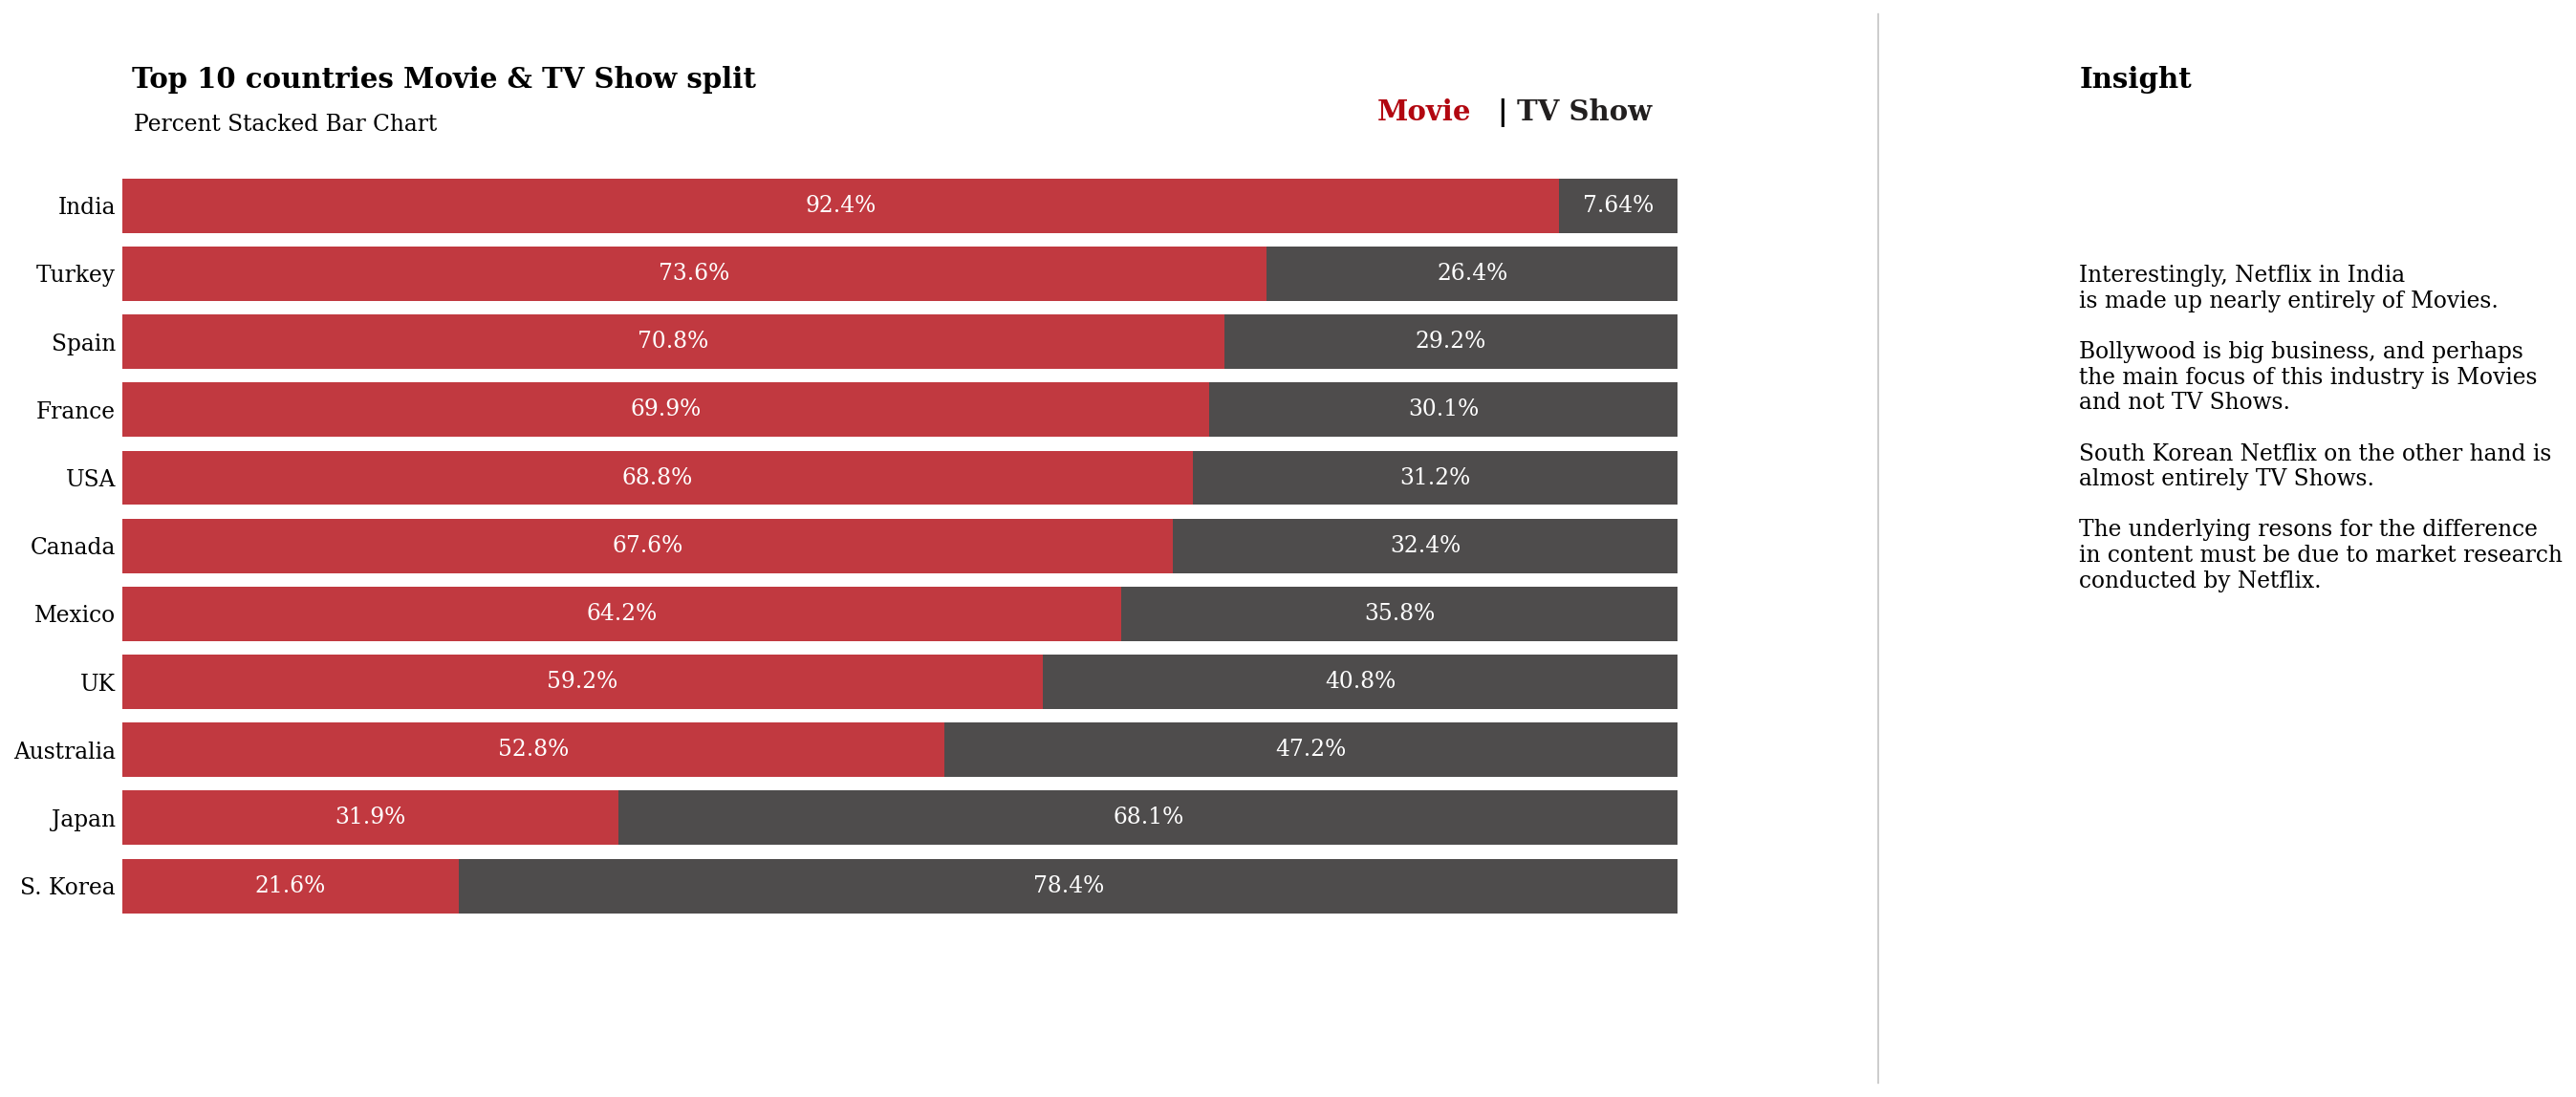

In [ ]:
# Get the top 10 countries by the number of productions
country_order = df['first_country'].value_counts()[:11].index

# Group by 'first_country' and 'type' to get the count of each type, then unstack and order by 'country_order'
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]

# Add a 'sum' column to get the total number of productions for each country
data_q2q3['sum'] = data_q2q3.sum(axis=1)

# Calculate the ratio of each type to the total, then sort and reverse the order
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

# Create a plot with specific size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Create horizontal bar charts for 'Movie' and 'TV Show' data
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], color='#221f1f', alpha=0.8, label='TV Show')

# Set the x-axis limit from 0 to 1
ax.set_xlim(0, 1)

# Remove x-axis ticks
ax.set_xticks([])

# Set custom y-axis tick labels
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# Annotate movie percentage on the bars
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
                xy=(data_q2q3_ratio['Movie'][i] / 2, i),
                va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif', color='white')

# Annotate TV show percentage on the bars
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
                xy=(data_q2q3_ratio['Movie'][i] + data_q2q3_ratio['TV Show'][i] / 2, i),
                va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif', color='white')

# Add main title to the plot
fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')

# Add sub-title to the plot
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12, fontfamily='serif')

# Remove plot spines (borders) for a cleaner look
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Add annotations for the legend
fig.text(0.75, 0.9, "Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81, 0.9, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82, 0.9, "TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Add an insight section with custom text
fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.44, '''Interestingly, Netflix in India
is made up nearly entirely of Movies.
Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.
South Korean Netflix on the other hand is almost entirely TV Shows.
The underlying reasons for the difference in content must be due to market research
conducted by Netflix.''' , fontsize=12, fontweight='light', fontfamily='serif')

# Import matplotlib lines module and add a vertical line for visual separation
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

# Customize tick parameters for a cleaner look
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='both', length=0)

# Display the plot
plt.show()


As I've noted in the insights on the plot, it is really interesting to see how the split of TV Shows and Movies varies by country.

South Korea is dominated by TV Shows

Equally, India is dominated by Movies.


# How has content been added over the years?

Netflix went global in 2016 - and it is extremely noticeable in this plot.

The increase is Movie content is remarkable.

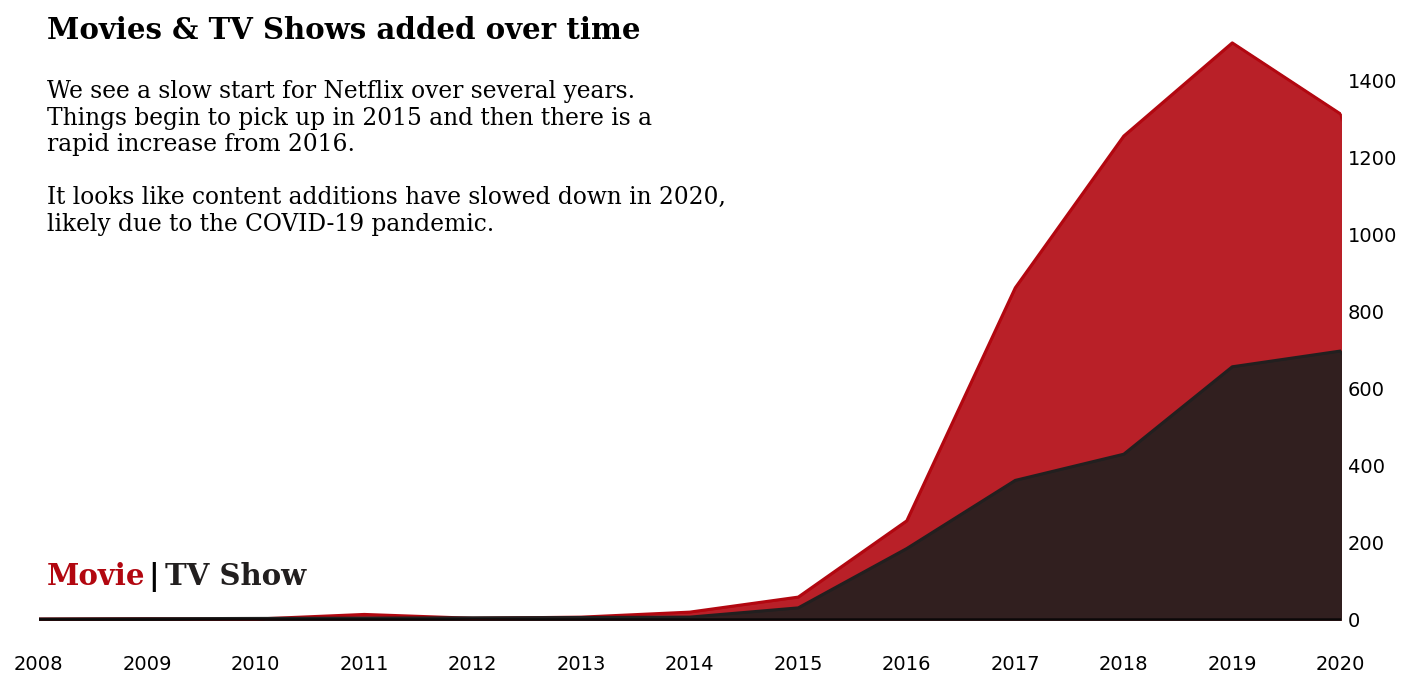

In [ ]:


# Create a figure and a single set of axes with specific size
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Define colors for Movies and TV Shows
color = ["#b20710", "#221f1f"]

# Loop through the unique values in the 'type' column
for i, mtv in enumerate(df['type'].value_counts().index):
    # Get the count of 'year_added' for each 'type' and sort by year
    mtv_rel = df[df['type'] == mtv]['year_added'].value_counts().sort_index()

    # Plot the data as a line for each 'type'
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)

    # Fill the area under the line
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

# Move y-axis ticks to the right side
ax.yaxis.tick_right()

# Add a horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

# Set x-axis limits
ax.set_xlim(2008, 2020)

# Set custom x-axis ticks
plt.xticks(np.arange(2008, 2021, 1))

# Add main title to the figure
fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')

# Add sub-title to the figure
fig.text(0.13, 0.59, '''We see a slow start for Netflix over several years. Things begin to pick up in 2015 and then there is a rapid increase from 2016.
It looks like content additions have slowed down in 2020, likely due to the COVID-19 pandemic.''', fontsize=12, fontweight='light', fontfamily='serif')

# Add annotation for 'Movie'
fig.text(0.13, 0.2, "Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')

# Add a separator between annotations
fig.text(0.19, 0.2, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')

# Add annotation for 'TV Show'
fig.text(0.2, 0.2, "TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Remove all axis spines for a cleaner look
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Disable grid lines
ax.grid(False)

# Remove tick marks for a cleaner look
ax.tick_params(axis='both', which='both', length=0)

# Display the plot
plt.show()


# Month-by-Month

We've seen how content has increased over the years, but are there certain months that, on average, tend to enjoy more content being added?

I'll show this in a couple of ways - a cumulative year view, and also as a radial plot...

In [ ]:
#Adding month
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

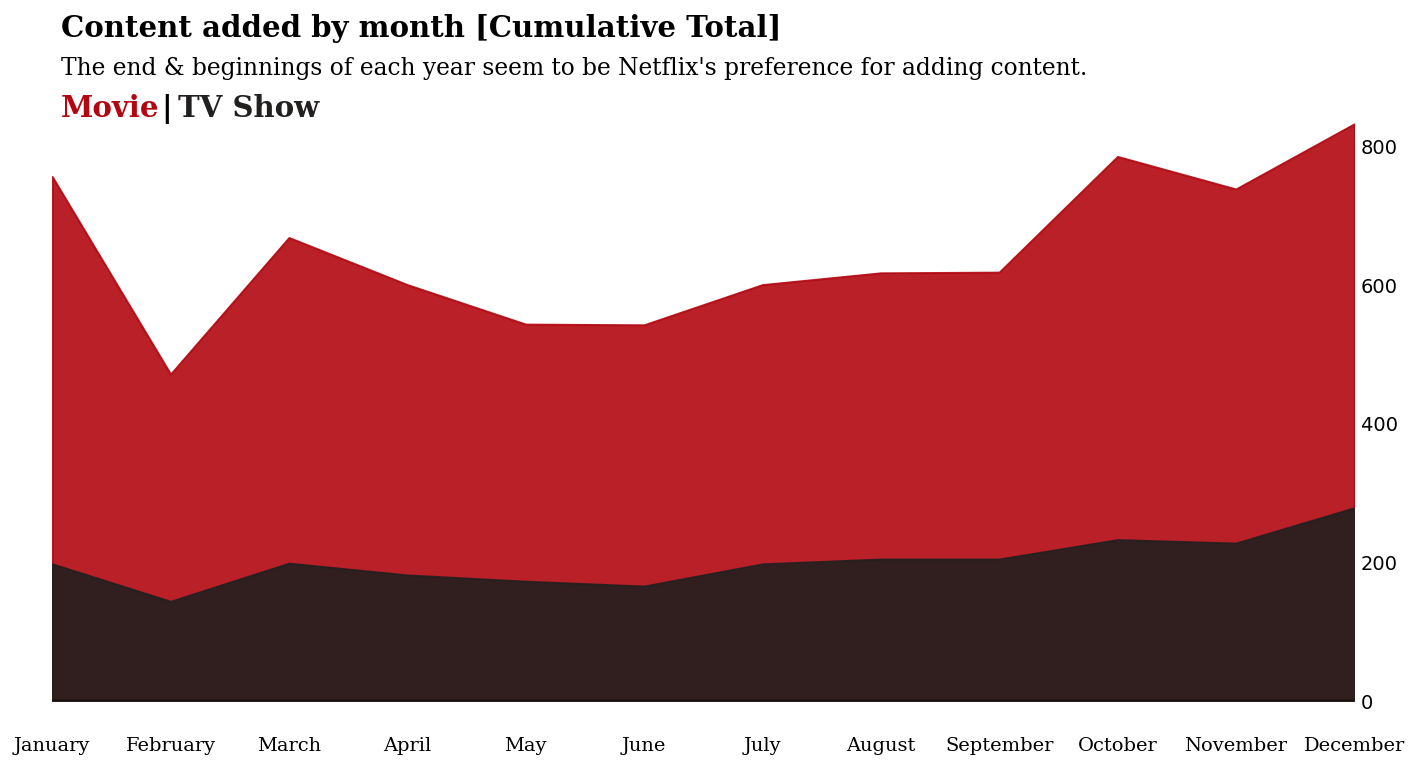

In [ ]:


# Group by 'type' and count occurrences of 'month_name_added', unstack the result, fill NaN with 0,
# locate TV Show and Movie, calculate cumulative sum, and transpose
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show', 'Movie']].cumsum(axis=0).T

# Create a plot with specific size
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Define colors for Movies and TV Shows
color = ["#b20710", "#221f1f"]

# Loop through the unique values in the 'type' column
for i, mtv in enumerate(df['type'].value_counts().index):
    # Get cumulative sum data for each 'type'
    mtv_rel = data_sub[mtv]

    # Fill the area under the line for each 'type'
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv, alpha=0.9)

# Move y-axis ticks to the right side
ax.yaxis.tick_right()

# Add a horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.4)

# Remove plot spines (borders) for a cleaner look
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Disable grid lines
ax.grid(False)

# Set custom x-axis tick labels
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)

# Remove white spaces next to margins
ax.margins(x=0)

# Add main title to the figure
fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')

# Add sub-title to the figure
fig.text(0.13, 0.905, "The end & beginnings of each year seem to be Netflix's preference for adding content.", fontsize=12, fontweight='light', fontfamily='serif')

# Add annotation for 'Movie'
fig.text(0.13, 0.855, "Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')

# Add a separator between annotations
fig.text(0.19, 0.855, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')

# Add annotation for 'TV Show'
fig.text(0.2, 0.855, "TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Remove tick marks for a cleaner look
ax.tick_params(axis='both', which='both', length=0)

# Display the plot
plt.show()


# This is a more interesting way to view how content is added across the year



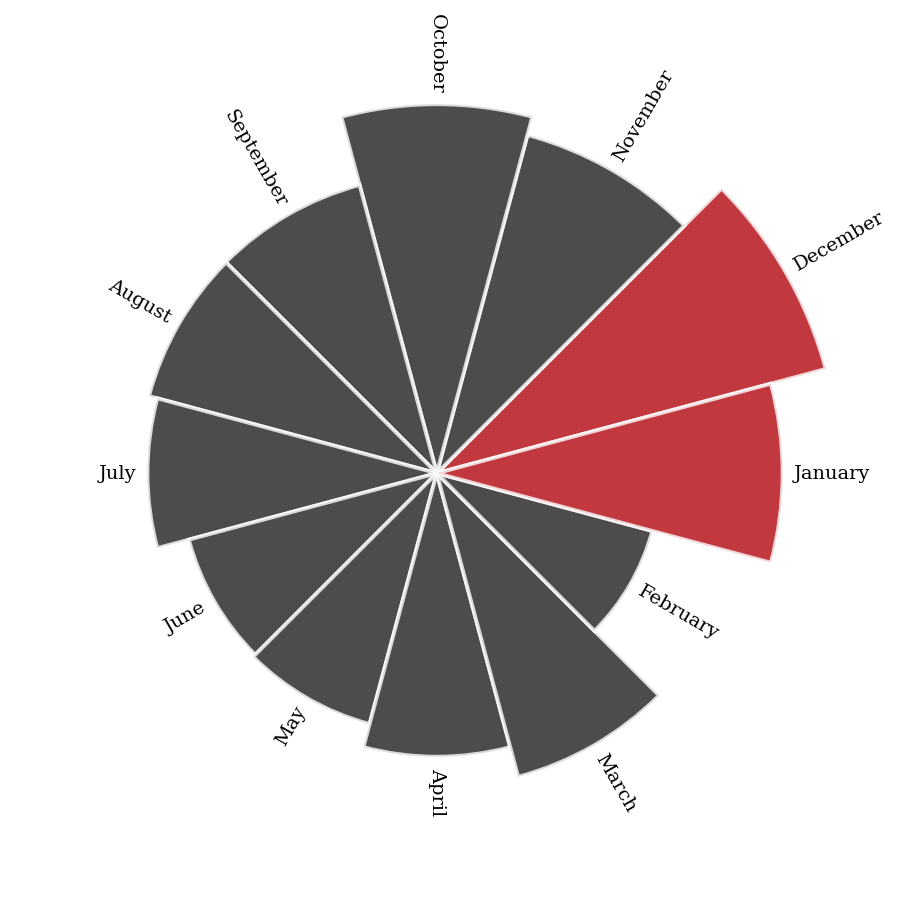

In [ ]:
# Copy data_sub DataFrame to data_sub2
data_sub2 = data_sub

# Add a new column 'Value' which is the sum of 'Movie' and 'TV Show' columns
data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']

# Reset the index of the DataFrame
data_sub2 = data_sub2.reset_index()

# Sort the DataFrame by 'month_name_added' in descending order
df_polar = data_sub2.sort_values(by='month_name_added', ascending=False)

# Create a color map for the bars, with default color and highlight for the first and last months
color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710'  # Color highlight for the first and last months

# Initialize the figure with specific size
plt.figure(figsize=(8, 8))
# Create a polar subplot
ax = plt.subplot(111, polar=True)
# Turn off the axis
plt.axis('off')

# Constants controlling the plot layout
upperLimit = 30  # Upper limit for bar height
lowerLimit = 1   # Lower limit for bar height
labelPadding = 30  # Padding for labels

# Compute max value in the dataset
max = df_polar['Value'].max()

# Compute heights: convert each item value to new coordinates
slope = (max - lowerLimit) / max
heights = slope * df_polar['Value'] + lowerLimit

# Compute the width of each bar. In total, we have 2*Pi = 360°
width = 2 * np.pi / len(df_polar.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(df_polar.index) + 1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles,  # Positions
    height=heights,  # Heights
    width=width,  # Widths
    bottom=lowerLimit,  # Start position for the bars
    linewidth=2,  # Line width for the edges
    edgecolor="white",  # Edge color
    color=color_map,  # Bar colors
    alpha=0.8  # Transparency
)

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, df_polar["month_name_added"]):
    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)
    # Flip some labels upside down for better readability
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    # Finally, add the labels
    ax.text(
        x=angle,  # X position
        y=lowerLimit + bar.get_height() + labelPadding,  # Y position
        s=label,  # Text
        ha=alignment, fontsize=10, fontfamily='serif',
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )


December & January are definitely the best months for new content.


# USA & India

As the two largest content countries using Netflix, lets compare USA and India

In [ ]:
# Filter the DataFrame to include only rows where the 'first_country' is either 'USA' or 'India'
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India')]

# Group the data by 'first_country', then count how many times each 'year_added' occurs for each country
# 'unstack()' converts the 'year_added' counts into columns, creating a new DataFrame
# 'fillna(0)' replaces any missing values (NaNs) with 0
# 'loc[['USA', 'India']]' selects only the rows for the USA and India
# 'cumsum(axis=0)' calculates the cumulative sum of the counts along the columns (i.e., by year)
# '.T' transposes the DataFrame so that the years become rows and the countries become columns
data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA', 'India']].cumsum(axis=0).T



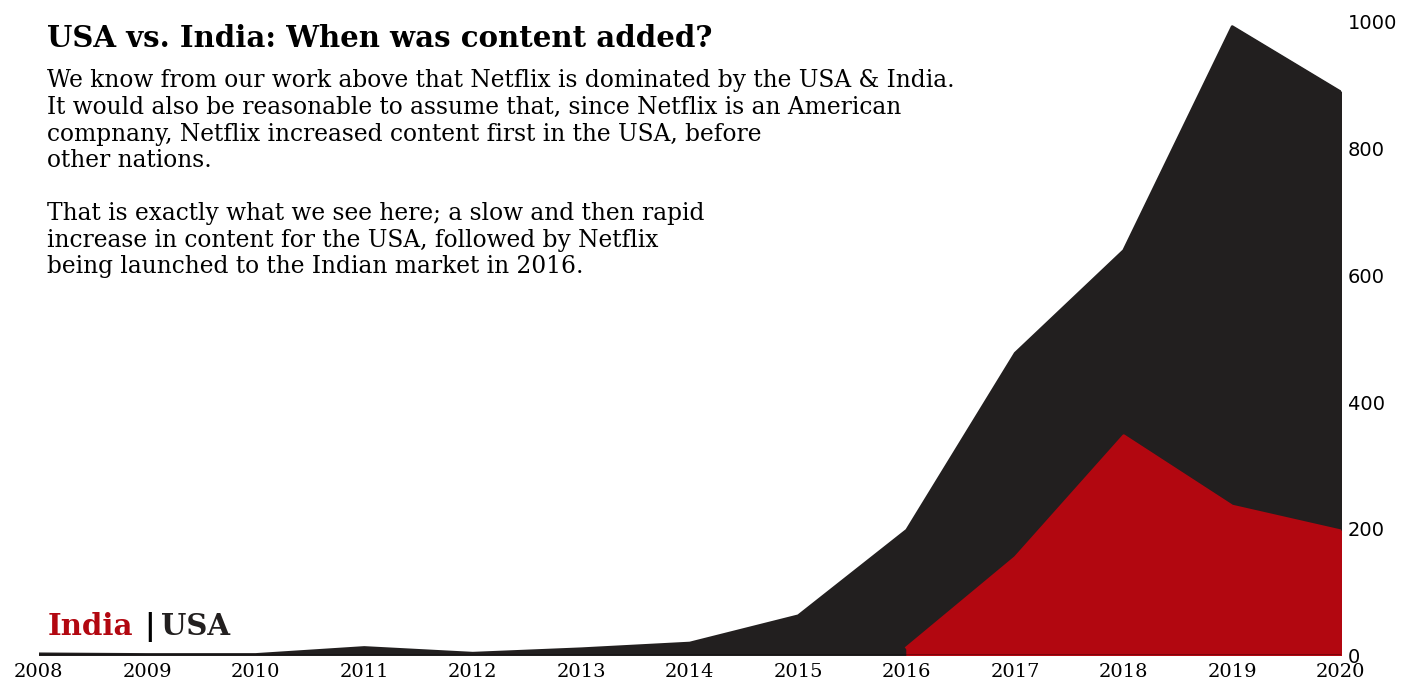

In [ ]:
# Create a figure and axis object using subplots, setting the figure size to 12x6
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Define a list of colors to use for the USA, India, and background
color = ['#221f1f', '#b20710','#f5f5f1']

# Loop through the countries (USA and India) and plot data for each
for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    # Filter the data for each country and count how many shows were added each year, then sort by year
    hs_built = us_ind[us_ind['first_country'] == hs]['year_added'].value_counts().sort_index()

    # Plot a line for the number of shows added each year for each country
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)

    # Fill the area under the line to create a filled plot for visual impact
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)

# Set the y-axis limit to a maximum of 1000
ax.set_ylim(0, 1000)

# Remove the top and right spines (borders) of the plot for a cleaner look
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Move the y-axis labels to the right side of the plot
ax.yaxis.tick_right()

# Add a horizontal line at y=0 for reference
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.4)

# Remove all four spines (borders) for a minimalist design
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Disable the grid lines for the plot
ax.grid(False)

# Set the x-axis labels to the years, using the index of the data (transposed data from earlier)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)

# Remove white spaces next to the margins on the x-axis
ax.margins(x=0)

# Set the x-axis limits to the range 2008 to 2020
ax.set_xlim(2008, 2020)

# Set custom x-axis ticks from 2008 to 2020 at intervals of 1 year
plt.xticks(np.arange(2008, 2021, 1))

# Add a title to the figure with custom font size, weight, and family
fig.text(0.13, 0.85, 'USA vs. India: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')

# Add a block of descriptive text explaining the insights gained from the plot
fig.text(0.13, 0.58,
'''
We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
company, Netflix increased content first in the USA, before
other nations.

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix
being launched to the Indian market in 2016.'''
, fontsize=12, fontweight='light', fontfamily='serif')

# Add text labels for "India" and "USA" with custom font size, color, and style
fig.text(0.13, 0.15, "India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188, 0.15, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198, 0.15, "USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Remove tick marks from both the x and y axes
ax.tick_params(axis=u'both', which=u'both', length=0)

# Display the final plot
plt.show()


So the USA dominates. But there is a plot that we can use to convey this in another way

In [ ]:
# Filter the DataFrame to include only rows where 'first_country' is either 'USA' or 'India'
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India')]

# Group the data by 'first_country' and then count how many times each 'year_added' occurs for each country
# 'unstack()' converts the 'year_added' counts into columns, creating a new DataFrame
# 'fillna(0)' replaces any missing values (NaNs) with 0
# 'loc[['USA', 'India']]' selects only the rows for the USA and India
# 'cumsum(axis=0)' calculates the cumulative sum of the counts along the columns (i.e., by year)
# '.T' transposes the DataFrame so that the years become rows and the countries become columns
data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA', 'India']].cumsum(axis=0).T

# Insert a new column at the beginning of 'data_sub' with all values as 0 to represent a base starting point
data_sub.insert(0, "base", np.zeros(len(data_sub)))

# Adjust the 'data_sub' DataFrame by subtracting half of the counts for each year added
# This centers the values by distributing the 'year_added' counts equally above and below the base line
data_sub = data_sub.add(-us_ind['year_added'].value_counts() / 2, axis=0)



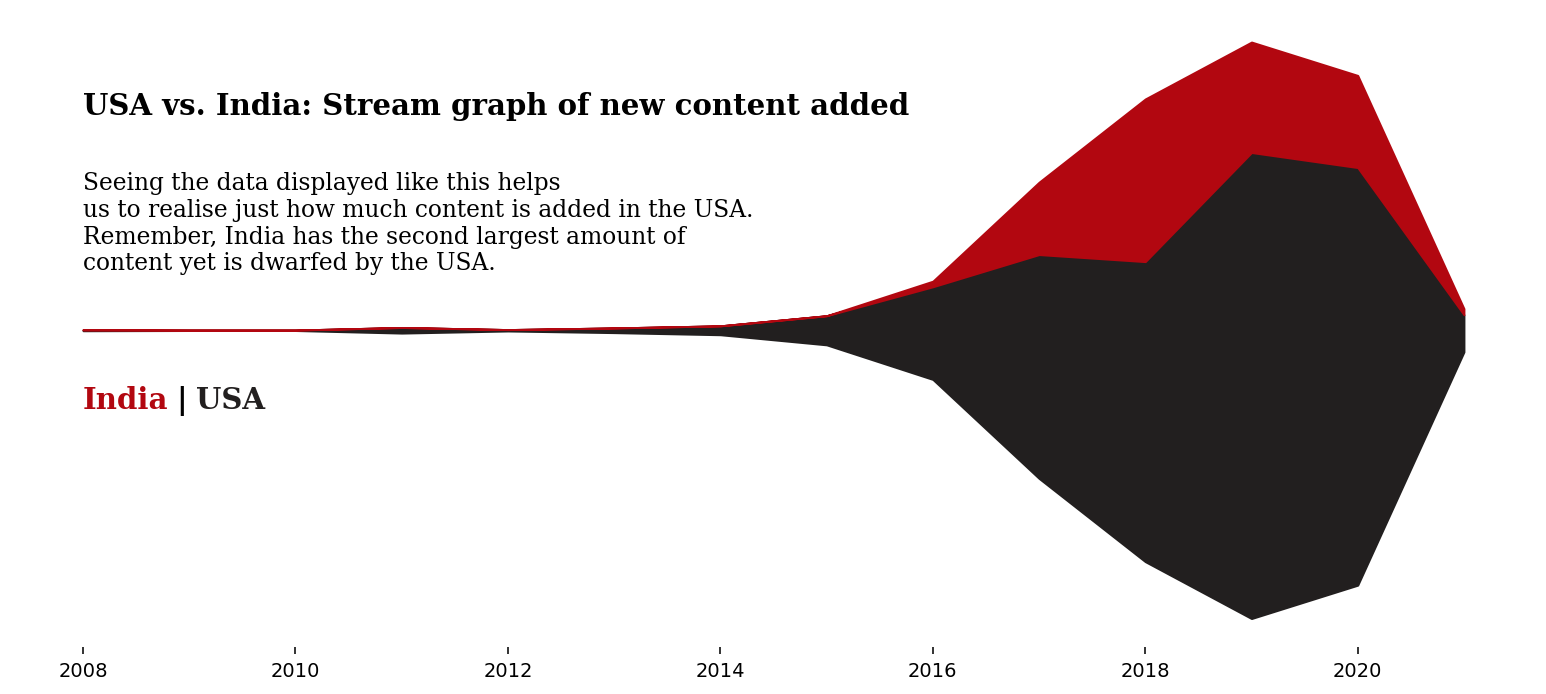

In [ ]:
# Create a figure and axis object using subplots, with a custom figure size of 14x6
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Define the color scheme for the plot, with two colors for India and the USA, then reverse the order
color = ['#b20710', '#221f1f'][::-1]  # '#b20710' for India, '#221f1f' for USA

# Get the list of column names (USA and India) from the 'data_sub' DataFrame
hs_list = data_sub.columns

# Initialize 'hs_built' with data for both countries to plot
hs_built = data_sub[hs]

# Loop through the list of countries (USA and India) and plot the cumulative content added over time
for i, hs in enumerate(hs_list):
    # Skip the first iteration, as there's no cumulative data to plot for the first country
    if i == 0: continue

    # Fill the area between the cumulative data for the current country and the previous country
    ax.fill_between(hs_built.index, data_sub.iloc[:, i-1], data_sub.iloc[:, i], color=color[i-1])

# Remove the top, right, bottom, and left spines (borders) of the plot for a cleaner look
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Ensure the grid lines are drawn behind the plot elements
ax.set_axisbelow(True)

# Remove y-axis ticks to simplify the plot visually
ax.set_yticks([])

# Remove the grid lines from the plot
ax.grid(False)

# Add the main title text to the figure with custom font size, weight, and family
fig.text(0.16, 0.76, 'USA vs. India: Stream graph of new content added', fontsize=15, fontweight='bold', fontfamily='serif')

# Add descriptive text explaining the data and the insights derived from the stream graph
fig.text(0.16, 0.575,
'''
Seeing the data displayed like this helps
us to realise just how much content is added in the USA.
Remember, India has the second largest amount of
content yet is dwarfed by the USA.'''
, fontsize=12, fontweight='light', fontfamily='serif')

# Add text labels for "India" and "USA" with custom font size, color, and style
fig.text(0.16, 0.41, "India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.208, 0.41, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.218, 0.41, "USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Remove y-axis tick marks entirely for a clean, minimalist design
ax.tick_params(axis=u'y', which=u'both', length=0)

# Display the final plot
plt.show()




---



# FINISH

